# 친환경자동차 등록 대수 현황 및 친환경자동차 충전소 시각화

> 충전 와트수에 따른 충전시간 비교

> 여름 겨울 배터리 수명

> 검색한 지역에 충전이 가능한 곳 Marker 표시

In [ ]:
import pandas as pd
import folium
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2021 지역별 전기차 현황 데이터

In [ ]:
df = pd.read_csv('/content/한국전력공사_지역별 전기차 현황정보_20220429.csv', encoding='cp949')

df.rename(columns = {'서울': '서울특별시', '인천': '인천광역시',
                     '경기': '경기도', '강원': '강원도',
                     '충북':'충청북도', '충남': '충청남도',
                     '대전': '대전광역시', '세종': '세종특별자치시',
                     '경북': '경상북도', '대구': '대구광역시',
                     '전북': '전라북도', '전남': '전라남도',
                     '광주': '광주광역시','경남': '경상남도',
                     '부산': '부산광역시', '울산': '울산광역시',
                     '제주':'제주특별자치도','합계':'합계'}, inplace = True)

In [ ]:
#합계를 이용해서 성장률 예측
Electric_vehicle_df = df[:]
Electric_vehicle_df = df.drop(['합계'], axis = 1)

Electric_vehicle_2021_df = Electric_vehicle_df[Electric_vehicle_df['기준일'].between('2021-01-01','2021-12-01')]
Electric_vehicle_2021_df = Electric_vehicle_2021_df.transpose().rename(columns = Electric_vehicle_2021_df.iloc[0])
Electric_vehicle_2021_df = Electric_vehicle_2021_df.drop(Electric_vehicle_2021_df.index[0])

Electric_vehicle_2021_df['합계'] = Electric_vehicle_2021_df.sum(axis = 1).astype('int64')

g_geo = '/content/전국행정구역경계.json'
electric_vehicle_status_map = folium.Map(location = [35.907757, 127.766922], tiles='Stamen Terrain', zoom_start = 6)

Electric_vehicle_2021_df.reset_index(inplace=True)

Electric_vehicle_2021_df.rename(columns = {'index': '시도'}, inplace=True)

folium.Choropleth(geo_data = g_geo,
            data = Electric_vehicle_2021_df,
            columns = ('시도', '합계'),
            key_on = 'properties.CTP_KOR_NM',
            fill_color='YlOrRd',
            ).add_to(electric_vehicle_status_map)

electric_vehicle_status_map.save('./electric_vehicle_status_map.html')
electric_vehicle_status_map

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


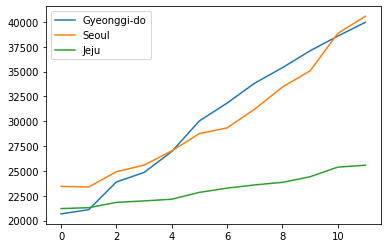

In [ ]:
Electric_vehicle_2021_df = Electric_vehicle_2021_df.sort_values(by = '합계', ascending=False)

#3개의 데이터만
top_df3 = Electric_vehicle_2021_df.iloc[:3] 

# 시도 열을 index
top_df3.set_index('시도', inplace=True)

# 합계 열 drop
top_df3.drop('합계', axis=1, inplace=True)

# 행과 열 뒤집기
top_df3 = top_df3.transpose()
top_df3.sort_index(inplace=True, ascending=False)
top_df3.reset_index(inplace=True, drop=True)

plt.plot(top_df3)
plt.legend(("Gyeonggi-do","Seoul", "Jeju"))
plt.show()

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vfidh21/revv69bg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9vfidh21/43mhmcwd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49625', 'data', 'file=/tmp/tmp9vfidh21/revv69bg.json', 'init=/tmp/tmp9vfidh21/43mhmcwd.json', 'output', 'file=/tmp/tmp9vfidh21/prophet_model

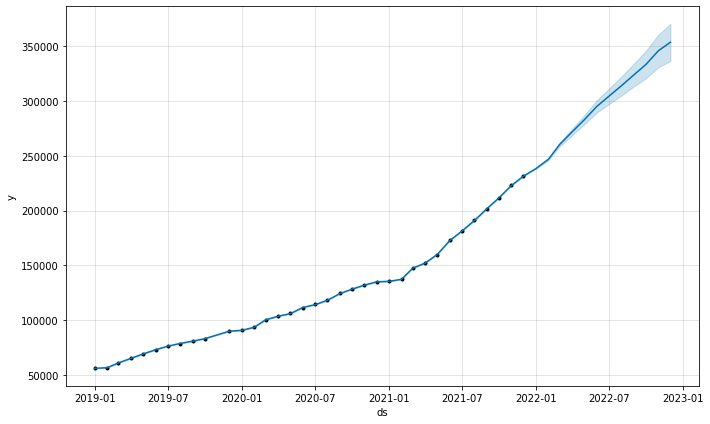

In [ ]:
from prophet import Prophet
# prophet을 사용하기 위해서는 다음과 같이 피처의 이름을 변경해야 합니다 : 'ds', 'y'
electric_vehicle_2019_2021_df = df[df['기준일'].between('2019-01-01', '2021-12-01')]

electric_vehicle_2019_2021_df.sort_values('기준일',inplace=True)

prophet_data = electric_vehicle_2019_2021_df[['기준일','합계']]
prophet_data.columns = ['ds', 'y']

prophet = Prophet()
prophet.fit(prophet_data)

future = prophet.make_future_dataframe(periods = 12, freq = 'MS')
prophet.predict(future)

pred = prophet.predict(future)

pred = pred[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

prophet.plot(pred)

plt.show()

In [ ]:
# electric_vehicle_2019_2020_test_df = df[df['기준일'].between('2021-01-01', '2021-3-01')]

# electric_vehicle_2019_2020_test_df.sort_values('기준일',inplace=True)
# electric_vehicle_2019_2020_test_df.reset_index(inplace=True)

# test_2019_2020_data = electric_vehicle_2019_2020_test_df[['기준일','합계']]
# test_2019_2020_data.columns=['ds','y']

# # 2019년 테스트 데이터
# electric_vehicle_2019_test_df = df[df['기준일'].between('2019-01-01', '2019-12-01')]

# electric_vehicle_2019_test_df.sort_values('기준일',inplace=True)
# electric_vehicle_2019_test_df.reset_index(inplace=True)

# test_2019_data = electric_vehicle_2019_test_df[['기준일','합계']]
# test_2019_data.columns=['ds','y']

# # 2020년 테스트 데이터
# electric_vehicle_2020_test_df = df[df['기준일'].between('2020-01-01', '2020-12-01')]

# electric_vehicle_2020_test_df.sort_values('기준일',inplace=True)
# electric_vehicle_2020_test_df.reset_index(inplace=True)

# test_2020_data = electric_vehicle_2020_test_df[['기준일','합계']]
# test_2020_data.columns=['ds','y']

# prophet = Prophet()
# prophet.fit(test_2019_data)

# future = prophet.make_future_dataframe(periods=12, freq='MS') # 예상할 범위 지정

# pred = prophet.predict(future)

# pred = pred[['ds','yhat']]
# pred.set_index('ds', inplace = True)

# pred = test_2020_data

# pred

# ax = test_2019_2020_data.plot()
# pred.plot(ax = ax, figsize=(20,10))

In [ ]:
# df_total = df[df['기준일'].between('2019-01-01', '2021-12-01')]
# df_total.sort_values('기준일',inplace=True)
# # print(df_total)

# df_2022 = df[df['기준일'].between('2022-01-01', '2022-03-01')]
# df_2022.sort_values('기준일',inplace=True)
# # print(df_2022)

# from statsmodels.tsa.arima_model import ARIMA
# import statsmodels.api as sm

# # (AR=2, 차분=1, MA=2) 파라미터로 ARIMA 모델을 학습합니다.
# model = ARIMA(df_total['합계'].values, order=(2,1,2))
# model_fit = model.fit(trend='c', full_output=True, disp=True)
# fig = model_fit.plot_predict() # 학습 데이터에 대한 예측 결과입니다. (첫번째 그래프)
# residuals = pd.DataFrame(model_fit.resid) # 잔차의 변동 을 시각화합니다. (두번째 그래프)
# residuals.plot()

# forecast_data = model_fit.forecast(steps = 365) # 학습 데이터셋으로부터 3일 뒤를 예측합니다.

# # 테스트 데이터셋을 불러옵니다.
# pred_y = forecast_data[0].tolist() # 마지막 3일의 예측 데이터입니다. (2018-08-27 ~ 2018-08-31)
# test_y = df_2022['합계'].values # 실제 5일 가격 데이터입니다. (2018-08-27 ~ 2018-08-31)
# pred_y_lower = [] # 마지막 5일의 예측 데이터의 최소값입니다.
# pred_y_upper = [] # 마지막 5일의 예측 데이터의 최대값입니다.
# for lower_upper in forecast_data[2]:
#   lower = lower_upper[0]
#   upper = lower_upper[1]
#   pred_y_lower.append(lower)
#   pred_y_upper.append(upper)

# plt.plot(pred_y, color="red") # 모델이 예상한 가격 그래프입니다.
# plt.plot(test_y, color="black") # 실제 가격 그래프입니다

### 위경도를 이용하여 전기차 충전소 지도 위의 시각화

> background = GoogleMap

In [ ]:
from folium.plugins import MarkerCluster

df = pd.read_csv('/content/한국전력공사_전기차충전소위경도_20220718.csv', encoding='cp949')

# googleMap background set
tiles = "http://mt0.google.com/vt/lyrs=m&hl=ko&x={x}&y={y}&z={z}"
charging_station_map=folium.Map(location = [35.907757, 127.766922], zoom_start = 7, tiles = tiles, attr = 'Google')

df_list = df['시도'].value_counts(sort = False)

In [ ]:
# Map 위경도 설정
charging_station_map=folium.Map(location = [35.907757, 127.766922], zoom_start = 7, tiles = tiles, attr = 'Google')

#MarkerCluster 를 이용하면 가까운 거리의 Marker들을 군집시켜서 해당 건수를 표현해준다
marker_cluster = MarkerCluster().add_to(charging_station_map)

for name, lat, lng in zip(df['충전소명'], df['경도'], df['위도']):
  folium.Marker([lat, lng], popup='<b>'+name+'</b>').add_to(marker_cluster)

charging_station_map.save('./charging_station_map.html')
charging_station_map

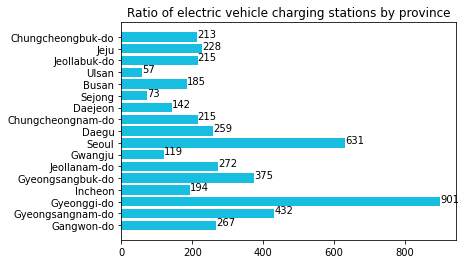

In [ ]:
df_columns = ['Gangwon-do', 'Gyeongsangnam-do', 'Gyeonggi-do', 'Incheon', 'Gyeongsangbuk-do', 'Jeollanam-do',
            'Gwangju', 'Seoul', 'Daegu', 'Chungcheongnam-do', 'Daejeon', 'Sejong', 'Busan', 'Ulsan', 'Jeollabuk-do',
            'Jeju','Chungcheongbuk-do']
y = np.arange(len(df_list))

plt.title("Ratio of electric vehicle charging stations by province")
plt.barh(y, df_list, color='#17bedf')
plt.yticks(y, df_columns)

for idx, value in enumerate(df_list):
    plt.text(value + 0.5, idx, str(value))

plt.show()